# OSM Math PS5
## Rebekah Dix

See the pdf for problems not solved here.

In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt

# Exercise 1

The constraints are:
\begin{align}
    &\frac{1}{3}(2x + 4) \leq y \\
    &\frac{1}{6}(x - 1) \leq y \\
    & y \leq 6 - x
\end{align}

### Plot the feasible set.

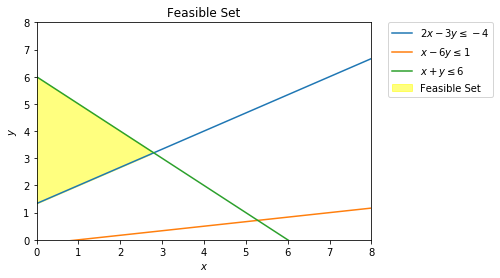

In [62]:
x = np.linspace(0, 10, 100)
y1= (1.0 / 3) * (2*x + 4)
y2= (1.0 / 6) * (x - 1)
y3= 6 - x

plt.plot(x, y1, label=r'$2x - 3y \leq -4$')
plt.plot(x, y2, label=r'$x - 6y \leq 1$')
plt.plot(x, y3, label=r'$x + y \leq 6$')
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.fill_between(x, y1, y3, where=y3>=y1, color='yellow', alpha=0.5, label='Feasible Set')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Feasible Set')
plt.show()

### Plot the objective function over the feasible set.

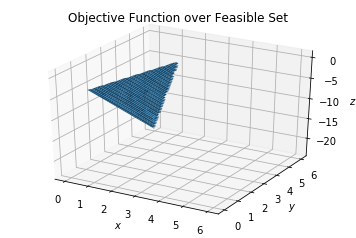

In [63]:
x = np.linspace(0, 6, 100)
y = np.copy(x)
X, Y = np.meshgrid(x, y)
Z = 5 * X - 4 * Y

# Impose constraints
Z[ (1.0 / 3) * (2*X + 4) > Y] = np.nan
Z[ (1.0 / 6) * (X - 1) > Y] = np.nan
Z[ 6 - X < Y] = np.nan

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_title('Objective Function over Feasible Set')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
plt.show()

### Use linear programming to find an optimizer for this program.

In [78]:
# turn the maximization problem into a minimization problem
c = [-5, +4]
A = [[2, -3], [1, -6], [1, 1]]
b = [-4, 1, 6]
res = opt.linprog(c, A_ub=A, b_ub=b, options={"disp": True})

Optimization terminated successfully.
         Current function value: -1.200000   
         Iterations: 2


In [80]:
print(res)

     fun: -1.200000000000001
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([17.4,  0. ,  0. ])
  status: 0
 success: True
       x: array([2.8, 3.2])


# Exercise 2

## Part (i)

### Draw the feasible polygon.

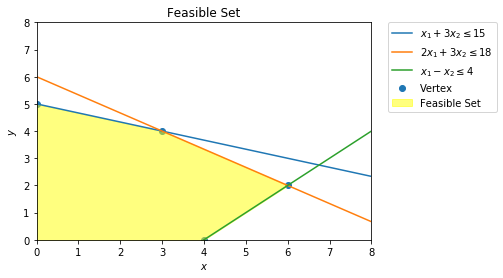

In [111]:
x = np.linspace(0, 10, 100)
x1= (1.0 / 3) * (15 - x)
x2= (1.0 / 3) * (18 - 2 * x)
x3= x - 4
upperCons = np.minimum(x1, x2)

verx = [0, 3, 6, 4]
very = [5, 4, 2, 0]
plt.plot(x, x1, label=r'$x_1 + 3x_2 \leq 15$')
plt.plot(x, x2, label=r'$2x_1 + 3x_2 \leq 18$')
plt.plot(x, x3, label=r'$x_1 - x_2 \leq 4$')
plt.scatter(verx, very, label='Vertex')
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.fill_between(x, upperCons, x3, where=x3 <= upperCons, color='yellow', alpha=0.5, label='Feasible Set')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Feasible Set')
plt.show()

### Identify all the vertices and find optimizer/optimum value.

By inspection, there are vertices at $(0,5)$, $(3,4)$, $(4,0)$,and $(6,2)$. We evaluate the function at these points to find that $(6,2)$ is the optimizer and $20$ is the value of the objective function.

#### Check:

In [5]:
# turn the maximization problem into a minimization problem
c = [-3, -1]
A = [[1, 3], [2, 3], [1, -1]]
b = [15, 18, 4]
res = opt.linprog(c, A_ub=A, b_ub=b, options={"disp": True})

Optimization terminated successfully.
         Current function value: -20.000000  
         Iterations: 2


In [6]:
print(res)

     fun: -20.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([3., 0., 0.])
  status: 0
 success: True
       x: array([6., 2.])


## Part (ii)

### Draw feasible polygon.

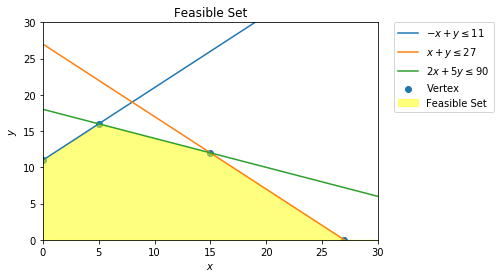

In [152]:
## x = np.linspace(0, 30, 100)
y1= 11 + x
y2= 27 - x
y3= (1.0 / 5) * (90 - 2*x)
upperCons = np.minimum(np.minimum(y1, y2),y3)
plt.plot(x, y1, label=r'$-x + y \leq 11$')
plt.plot(x, y2, label=r'$x + y \leq 27$')
plt.plot(x, y3, label=r'$2x + 5y \leq 90$')
plt.xlim(0, 30)
plt.ylim(0, 30)
verx = [5, 0, 15, 27]
very = [16, 11, 12, 0]
plt.scatter(verx, very, label='Vertex')
plt.fill_between(x, 0, upperCons, color='yellow', alpha=0.5, label='Feasible Set')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Feasible Set')
plt.show()

### Identify all the vertices and find optimizer/optimum value.

The vertices are $(5, 16)$, $(0,11)$, $(15, 12)$, and $(27,0)$.

In [156]:
def func(x,y):
    return 4 * x + 6 * y
val1 = func(5, 16)
val2 = func(0, 11)
val3 = func(15, 12)
val4 = func(27,0)
print(val1, val2, val3, val4)

116 66 132 108


Thus, the optimizer is $(15, 12)$ and the optimum value is $132$.

#### Check:

In [3]:
# turn the maximization problem into a minimization problem
c = [-4, -6]
A = [[-1, 1], [1, 1], [2, 5]]
b = [11, 27, 90]
res = opt.linprog(c, A_ub=A, b_ub=b, options={"disp": True})

Optimization terminated successfully.
         Current function value: -132.000000 
         Iterations: 3


In [4]:
print(res)

     fun: -132.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([14.,  0.,  0.])
  status: 0
 success: True
       x: array([15., 12.])


# Exercise 3

Let $x_1$ be the number of GI Barb soldiers he produces and $x_2$ the number of Joey dolls he produces. Then, Kenny's linear optimization problem is,
\begin{align}
     &\max_{x_1, x_2} 4x_1 + 3x_2 \\
     \text{s.t. } &2x_1 + 2x_2 \leq 300 \\
     &15x_1 + 10x_2 \leq 1800 \\
     &x_2 \leq 200 \\
     &x_1, x_2 \geq 0
\end{align}
where the first constraint represents the constraint on total molding labor (expressed in minutes), the second constraint represents the constraint on finishing labor (expressed in minutes), and the third constraint represents the demand constraint for Joey dolls.

In [10]:
# turn the maximization problem into a minimization problem
c = [-4, -3]
A = [[2, 2], [15, 10], [0, 1]]
b = [300, 1800, 200]
res = opt.linprog(c, A_ub=A, b_ub=b, options={"disp": True})

Optimization terminated successfully.
         Current function value: -510.000000 
         Iterations: 2


In [12]:
print(res)

     fun: -510.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([  0.,   0., 110.])
  status: 0
 success: True
       x: array([60., 90.])


## Exercise 4

The linear optimization problem whose solution gives the optimal flow in this nework with these constraints is given by:
\begin{align}
     &\min_{x_{ij}:(i,j)\in E} 5x_{AD} + 2x_{AB} + 2x_{BD} + 4x_{DE} + 7x_{BE} + 5x_{BC} + 9x_{BF} + 3x_{EF} + 2x_{CF} \\
\text{s.t. } &x_{AB} + x_{AD} = 10 \\
             &x_{BD} + x_{BE} + x_{BF} - x_{AB} - x_{BC} = 1 \\
             &x_{CF} - x_{BC} = -2 \\
             &x_{DE} - x_{AD} - x_{BD} = -3 \\
             &x_{EF} - x_{BE} - x_{DE} = 4 \\
             &-x_{BF} - x_{CF} - x_{EF} = -10 \\
             &0\leq x_{AB}, x_{AD}, x_{BD}, x_{DE}, x_{BE}, x_{BC}, x_{BF}, x_{EF}, x_{CF} \leq 6
\end{align}

# Exercises 5, 6: See PS write-up.

# Exercise 7: See PS write-up.

#### Check (i)

In [14]:
c = [-1, -2]
A = [[-4, -2], [-2, 3], [1, 0]]
b = [-8, 6, 3]
res = opt.linprog(c, A_ub=A, b_ub=b, options={"disp": True})

Optimization terminated successfully.
         Current function value: -11.000000  
         Iterations: 3


In [15]:
print(res)

     fun: -11.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([12.,  0.,  0.])
  status: 0
 success: True
       x: array([3., 4.])


#### Check (ii)

In [16]:
c = [-5, -2]
A = [[5, 3], [3, 5], [4, -3]]
b = [15, 15, -12]
res = opt.linprog(c, A_ub=A, b_ub=b, options={"disp": True})

Optimization failed. Unable to find a feasible starting point.


#### Check (iii)

In [17]:
c = [3, -1]
A = [[0, 1], [-2, 3]]
b = [4, 6]
res = opt.linprog(c, A_ub=A, b_ub=b, options={"disp": True})

Optimization terminated successfully.
         Current function value: -2.000000   
         Iterations: 1


In [18]:
print(res)

     fun: -2.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([2., 0.])
  status: 0
 success: True
       x: array([0., 2.])


# Exercise 8: See PS write-up.

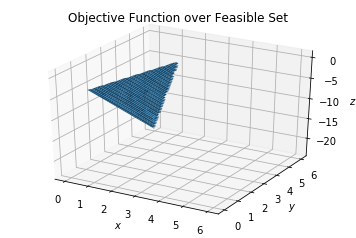

In [2]:
x = np.linspace(0, 6, 100)
y = np.copy(x)
X, Y = np.meshgrid(x, y)
Z = 5 * X - 4 * Y

# Impose constraints
Z[ (1.0 / 3) * (2*X + 4) > Y] = np.nan
Z[ (1.0 / 6) * (X - 1) > Y] = np.nan
Z[ 6 - X < Y] = np.nan

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_title('Objective Function over Feasible Set')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
plt.show()

# Exercise 18: See PS write-up.

#### Check:

In [2]:
c = [-1, -1]
A = [[2, 1], [1, 3], [2, 3]]
b = [3, 5, 4]
res = opt.linprog(c, A_ub=A, b_ub=b, options={"disp": True})

Optimization terminated successfully.
         Current function value: -1.750000   
         Iterations: 2


In [3]:
print(res)

     fun: -1.75
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.  , 2.25, 0.  ])
  status: 0
 success: True
       x: array([1.25, 0.5 ])


In [4]:
c = [3, 5, 4]
A = [[-2, -1, -2], [-1, -3, -3]]
b = [-1, -1]
res = opt.linprog(c, A_ub=A, b_ub=b, options={"disp": True})

Optimization terminated successfully.
         Current function value: 1.750000    
         Iterations: 2


In [5]:
print(res)

     fun: 1.75
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([0.25, 0.  , 0.25])
